In [1]:
# import lib
import pandas
import numpy

In [2]:
# read input file
input_file = './Gold_price.xlsx'
df = pandas.read_excel(input_file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         847 non-null    object 
 1   Price (USD)  847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [3]:
# rename columns
df.rename(columns={'Price (USD)' : 'price', 'Date' : 'date'}, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 847 entries, 0 to 846
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   date    847 non-null    object 
 1   price   847 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.4+ KB


In [4]:
#review data frame
df.head()

,date,price
0,1950-01,34.73
1,1950-02,34.73
2,1950-03,34.73
3,1950-04,34.73
4,1950-05,34.73


In [5]:
# calculate average forecast
step = 5
df['average_forecast'] = [0 for i in range(step)] + \
    [numpy.average(df['price'].loc[i - step : i - 1]) \
        for i in df.index[step:]]
# calculate average forecast loss
df['average_loss'] = df['price'] - df['average_forecast']

#review the calcutaion
df.loc[5:10]

,date,price,average_forecast,average_loss
5,1950-06,34.73,34.73,0.0
6,1950-07,34.73,34.73,0.0
7,1950-08,34.73,34.73,0.0
8,1950-09,34.73,34.73,0.0
9,1950-10,34.73,34.73,0.0
10,1950-11,34.73,34.73,0.0


In [6]:
# define functions for calculate linear forecast
def deviations(arr):
    mean = numpy.mean(arr)
    return numpy.array([x - mean for x in arr])

def linear(x, known_ys, known_xs):
    if (len(known_ys) != len(known_xs)): 
        return numpy.nan
    
    x_deviations = deviations(known_xs)
    y_deviations = deviations(known_ys)

    b = sum(x_deviations * y_deviations) / sum(x_deviations * x_deviations)
    
    a = numpy.mean(known_ys) - b * numpy.mean(known_xs)

    return a + b * x

In [7]:
#calculate linear forecast
step = 17

df['linear_forecast'] = [0 for i in range(step)] + \
    [linear(i + step, \
        df['price'].loc[i: i + step - 1].to_numpy(), \
            df.index[i:i+step].to_numpy()) for i in range(len(df.index) - step)]
df['linear_loss'] = df['price'] - df['linear_forecast']

#review the calcutaion
df.loc[17:22]

,date,price,average_forecast,average_loss,linear_forecast,linear_loss
17,1951-06,34.73,34.728,0.002,34.727279,0.002721
18,1951-07,34.72,34.730,-0.010,34.727721,-0.007721
19,1951-08,34.71,34.728,-0.018,34.725809,-0.015809
20,1951-09,34.71,34.724,-0.014,34.721765,-0.011765
21,1951-10,34.71,34.720,-0.010,34.718162,-0.008162
22,1951-11,34.73,34.716,0.014,34.715000,0.015000


In [8]:
#review the calcutaion of forecast methods
df.tail()

,date,price,average_forecast,average_loss,linear_forecast,linear_loss
842,2020-03,1593.764,1521.2394,72.5246,1597.568154,-3.804154
843,2020-04,1680.030,1541.0392,138.9908,1622.649279,57.380721
844,2020-05,1715.697,1582.6610,133.0360,1660.582088,55.114912
845,2020-06,1734.032,1629.7954,104.2366,1700.784801,33.247199
846,2020-07,1840.807,1664.4682,176.3388,1740.858154,99.948846


<AxesSubplot:title={'center':'Moving Average'}, xlabel='DateTime', ylabel='Gold Price'>

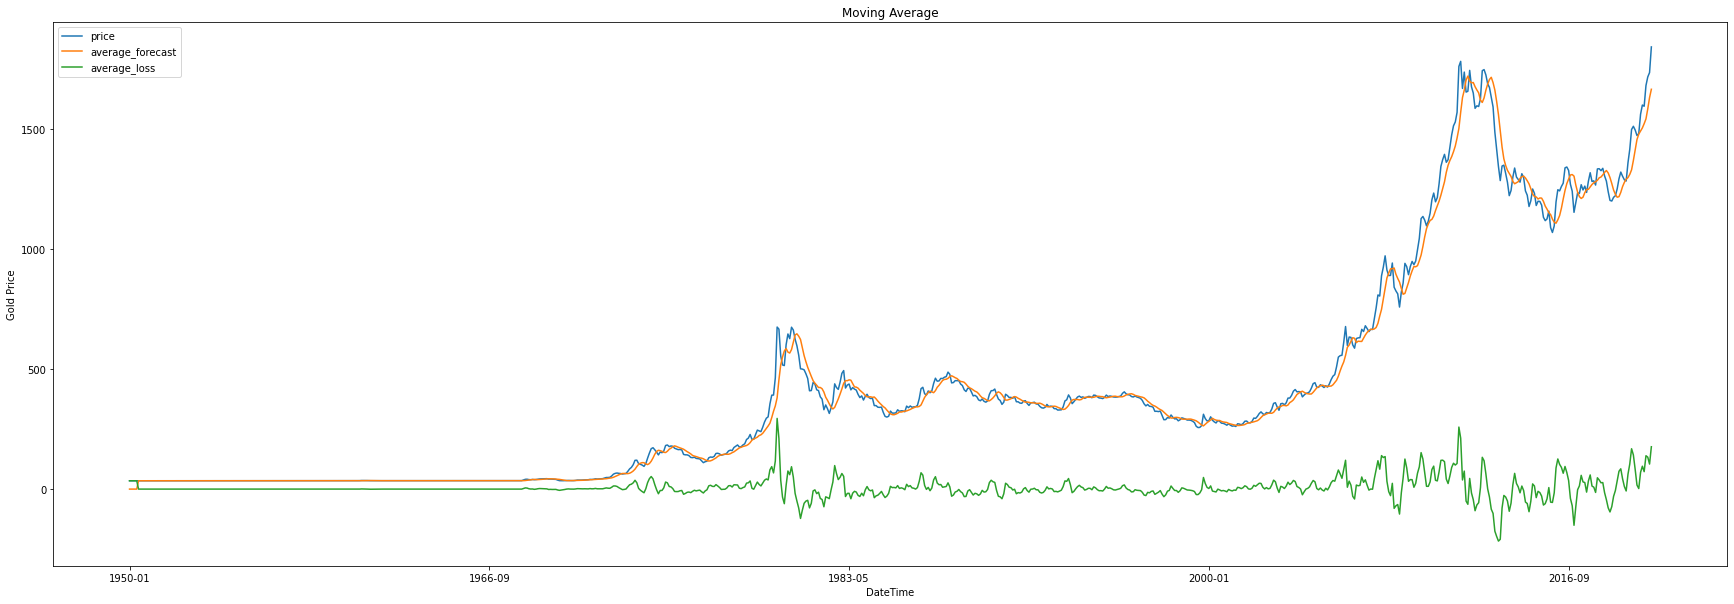

In [9]:
# export line plot for average forecast 
df.plot(x='date', y=['price','average_forecast','average_loss'], \
    kind='line', xlabel ='DateTime',ylabel='Gold Price', \
        title='Moving Average', figsize=(30,10))

<AxesSubplot:title={'center':'Moving Average'}, xlabel='DateTime', ylabel='Gold Price'>

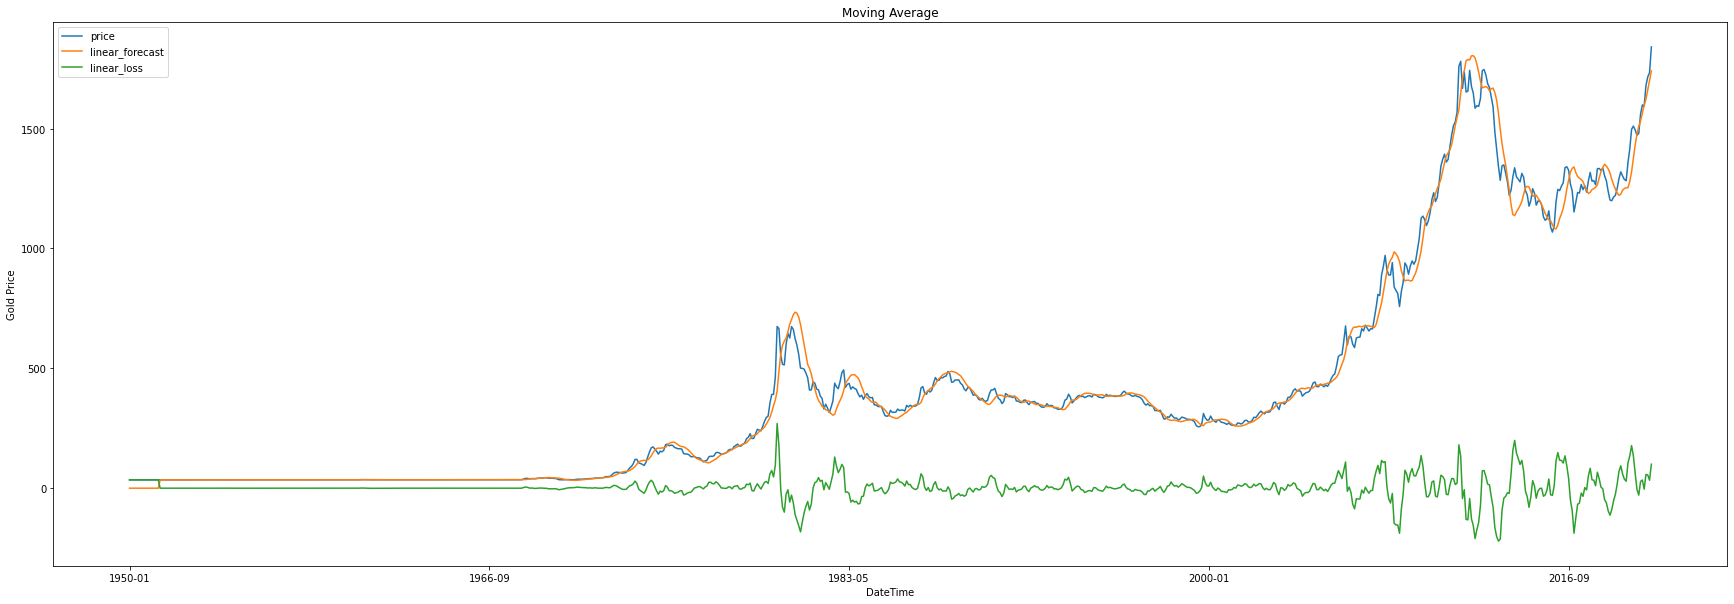

In [10]:
df.plot(x='date', y=['price','linear_forecast','linear_loss'], \
    kind='line', xlabel ='DateTime',ylabel='Gold Price', \
        title='Moving Average', figsize=(30,10))

In [11]:
# compare the loss of two methods
print('average_loss')
print('\tMAX     \t', df['average_loss'].max())
print('\tMIN     \t', df['average_loss'].min())
print('\tAVERAGE \t', df['average_loss'].mean())

print('linear_loss')
print('\tMAX      \t', df['linear_loss'].max())
print('\tMIN      \t', df['linear_loss'].min())
print('\tAVERAGE  \t', df['linear_loss'].mean())

average_loss
	MAX     	 294.29320000000007
	MIN     	 -216.4269999999999
	AVERAGE 	 6.278247461629283
linear_loss
	MAX      	 269.736551470589
	MIN      	 -220.67106617647073
	AVERAGE  	 1.808381988332512


In [12]:
df.to_excel('./Gold_price.forecast.xlsx')